In [1]:
%matplotlib inline
import noise
import numpy as np
import matplotlib
from mpl_toolkits.mplot3d import axes3d

In [2]:
from scipy import fft, arange
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import os
from math import log2, pow


160
7392256


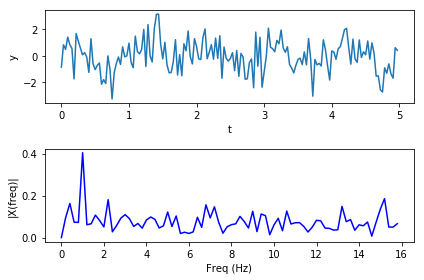

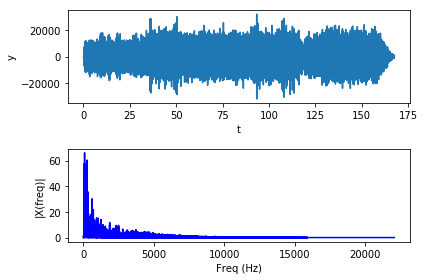

In [3]:
def frequency_sepectrum(x, sf):
    """
    Derive frequency spectrum of a signal from time domain
    :param x: signal in the time domain
    :param sf: sampling frequency
    :returns frequencies and their content distribution
    """
    x = x - np.average(x)  # zero-centering

    n = len(x)
    print(n)
    k = arange(n)
    tarr = n / float(sf)
    frqarr = k / float(tarr)  # two sides frequency range

    frqarr = frqarr[range(n // 2)]  # one side frequency range
    
    x = fft(x) / n  # fft computing and normalization
    x = x[range(n // 2)]

    return frqarr, abs(x)
# Sine sample with a frequency of 1hz and add some noise
sr = 32  # sampling rate
y = np.linspace(0, 2*np.pi, sr)
y = np.tile(np.sin(y), 5)
y += np.random.normal(0, 1, y.shape)
t = np.arange(len(y)) / float(sr)

plt.subplot(2, 1, 1)
plt.plot(t, y)
plt.xlabel('t')
plt.ylabel('y')

frq, X = frequency_sepectrum(y, sr)

plt.subplot(2, 1, 2)
plt.plot(frq, X, 'b')
plt.xlabel('Freq (Hz)')
plt.ylabel('|X(freq)|')
plt.tight_layout()


wav_file_name = 'SongyBoy.wav'
sr, signal = wavfile.read(wav_file_name)

y = signal[:, 0]  # use the first channel (or take their average, alternatively)
t = np.arange(len(y)) / float(sr)

plt.figure()
plt.subplot(2, 1, 1)
plt.plot(t, y)
plt.xlabel('t')
plt.ylabel('y')

frq, X = frequency_sepectrum(y, sr)

plt.subplot(2, 1, 2)
plt.plot(frq, X, 'b')
plt.xlabel('Freq (Hz)')
plt.ylabel('|X(freq)|')
plt.tight_layout()

plt.show()

frq2= np.vectorize(frq)



In [4]:
#######FREQUENCY###############
WVIA = 299702547 #Wave Velocity in air
secondTime = int(input("how long in seconds is the song?"))
Time = secondTime / 1000
Wavelength = WVIA * Time
freq = Wavelength / WVIA


C = 1
CS = 1.5
D = 2
DS = 2.5
E = 3
F = 4
FS = 4.5
G = 5
GS = 5.5
A = 6
AS = 6.5
B = 7
A4 = 440
C0 = A4*pow(2, -4.75)
name = [C, CS, D, DS, E, F, FS, G, GS, A, AS, B]
    


h = round(12*log2(freq/C0))
octave = h // 12
n = h % 12
ActFreq = name[n] - int(octave)
amplitude = -octave / 2
print(ActFreq)
print (-octave)
print(amplitude)


how long in seconds is the song?69
9.5
8
4.0


In [5]:
#Interacting
#octaves -- specifies the number of passes for generating fBm noise,
 #   defaults to 1 (simple noise).
    
  #  persistence -- specifies the amplitude of each successive octave relative
   # to the one below it. Defaults to 0.5 (each higher octave's amplitude
    #is halved). Note the amplitude of the first pass is always 1.0.
    
    #lacunarity -- specifies the frequency of each successive octave relative
    #to the one below it, similar to persistence. Defaults to 2.0.
    
    #repeatx, repeaty, repeatz -- specifies the interval along each axis when 
    #the noise values repeat. This can be used as the tile size for creating 
    #tileable textures
    
    #base -- specifies a fixed offset for the input coordinates. Useful for
    #generating different noise textures with the same repeat interval


help(noise.pnoise2)
help(noise.pnoise3)

noise2(...)
noise2(x, y, octaves=1, persistence=0.5, lacunarity=2.0, repeatx=1024, repeaty=1024, base=0.0)
    

noise3(...)
noise3(x, y, z, octaves=1, persistence=0.5, lacunarity=2.0, repeatx=1024, repeaty=1024, repeatz=1024, base=0.0)
#return perlin "improved" noise value for specified coordinate
    

In [6]:
shape = (100,100)
scale = 100.0
octaves = (-octave)
persistence = (amplitude / 4)
lacunarity = (ActFreq / 4) 

world = np.zeros(shape)
for i in range(shape[0]):
    for j in range(shape[1]):
        world[i][j] = noise.pnoise2(i/scale, 
                                    j/scale, 
                                    octaves=octaves, 
                                    persistence=persistence, 
                                    lacunarity=lacunarity, 
                                    repeatx=1024, 
                                    repeaty=1024, 
                                    base=42)

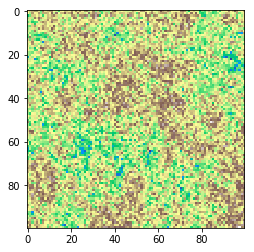

In [10]:
matplotlib.pyplot.imshow(world,cmap='terrain')


In [11]:
lin_x = np.linspace(0,1,shape[0],endpoint=False)
lin_y = np.linspace(0,1,shape[1],endpoint=False)
x,y = np.meshgrid(lin_x,lin_y)

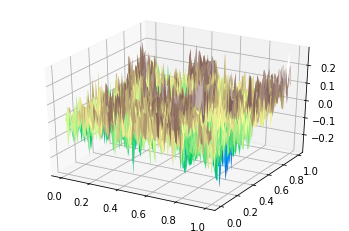

In [12]:
fig = matplotlib.pyplot.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(x,y,world,cmap='terrain')


In [13]:
terrain_cmap = matplotlib.cm.get_cmap('terrain')
def matplotlib_to_plotly(cmap, pl_entries):
    h = 1.0/(pl_entries-1)
    pl_colorscale = []

    for k in range(pl_entries):
        C = list(map(np.uint8, np.array(cmap(k*h)[:3])*255))
        pl_colorscale.append([k*h, 'rgb'+str((C[0], C[1], C[2]))])

    return pl_colorscale

terrain = matplotlib_to_plotly(terrain_cmap, 255)

In [14]:
import plotly
import plotly.graph_objects as go
plotly.offline.init_notebook_mode(connected=True)

fig = go.Figure(data=[go.Surface(colorscale=terrain,z=world)])

fig.update_layout(title='Random 3D Terrain')

# Note that include_plotlyjs is used as cdn so that the static site generator can read it and present it on the browser. This is not typically required.
html = plotly.offline.plot(fig, filename='3d-terrain-plotly.html',include_plotlyjs='cdn')

In [15]:
from IPython.core.display import HTML
HTML(html)